# 250508 Nice Plot for Thesis Latex font

In [1]:
# import stuff

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy 
from scipy.optimize import curve_fit


In [2]:
w0 = [4.928, 4.949, 5.324, 4.905]
np.mean(w0),np.std(w0)

(5.0264999999999995, 0.17246521388384375)

In [3]:
# copy paste this code to the beginning of your script to set the plotting style for a two column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    # "figure.constrained_layout.use": True
})

plt.rcParams["figure.autolayout"] = False # set to True if you want to use constrained_layout

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,3.5)
plt.rcParams["figure.titlesize"] = 10 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 10 # control title size
plt.rcParams["axes.labelsize"] = 10 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 10 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 10 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "upper left" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 6 #data point size

# CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"
plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 6 #data point size
plt.rcParams["lines.markeredgewidth"] = 1.5 # width of the edge of the marker
plt.rcParams["lines.markeredgecolor"] = "black" # color of the edge of the marker
# plt.rcParams["lines.markerfacecolor"] = "dodgerblue" # color of the inside of the marker
plt.rcParams["lines.marker"] = "o" # marker type, see https://matplotlib.org/stable/api/markers_api.html for all options
plt.rcParams["lines.color"] = "black" # color of the line
# # CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"

plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = True
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7





# plot two figures side by side
# fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, constrained_layout=True)
# plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2) # remove unnecessary white space how i like it, this is manual very of use constrained_layout

# That warning is because matplotlib’s default layout engine has changed in recent
# versions to use constrained_layout, which is incompatible with subplots_adjust and tight_layout. 
# If you try to use plt.subplots_adjust when constrained_layout=True, matplotlib will raise that warning and ignore the call.
# If you're manually adjusting spacing, disable constrained_layout when you create the figure:

# Data 230503

Beam waist for far forward data fit is 4.928mm.
Beam waist for far reverse data fit is 4.949mm.


Text(0.5, 1.0, '230504 Knife Edge Beam Waist Measurement 150cm from telescope')

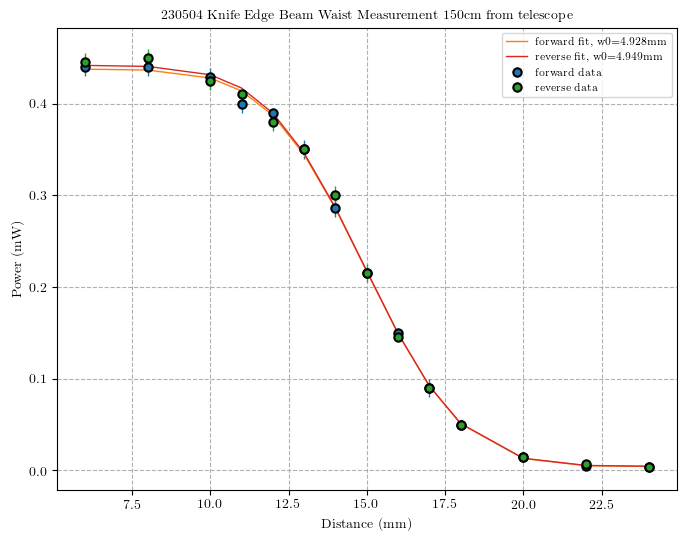

In [4]:
df = pd.read_excel("230503KnifeEdgeMeasurement.xlsx",sheet_name="1647")
distance_150cm = df.iloc[19:33,0].astype(float)
farpower_150cm_forward_distance = df.iloc[19:33,1].astype(float)
farpower_150cm_forward_distance_uncertaintiy = df.iloc[19:33,2].astype(float)
farpower_150cm_reversed_distance = df.iloc[19:33,3].astype(float)
farpower_150cm_reversed_distance_uncertaintiy = df.iloc[19:33,4].astype(float)

# fit data to error function
# define fitting function
def KnifeEdgeFit(x,a,b,x0,w):
    return b+0.5*a*(1-scipy.special.erf((np.sqrt(2)*(x0-x)/w)))

# Far fit
pOptFarForward, pCovFarForward = curve_fit(KnifeEdgeFit, distance_150cm, farpower_150cm_forward_distance,p0=[0.5,0,14.0,5])
pOptFarReverse, pCovFarReverse = curve_fit(KnifeEdgeFit, distance_150cm, farpower_150cm_reversed_distance,p0=[0.5,0,14.0,5])
print('Beam waist for far forward data fit is %.3fmm.'%pOptFarForward[3])
print('Beam waist for far reverse data fit is %.3fmm.'%pOptFarReverse[3])

# plot data and fit for far data forward and reverse

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.errorbar(distance_150cm,farpower_150cm_forward_distance,yerr=farpower_150cm_forward_distance_uncertaintiy,fmt='o',label='forward data')
# ax.plot(distance_150cm,farpower_150cm_forward_distance,'o',label='forward data')
ax.plot(distance_150cm,KnifeEdgeFit(distance_150cm,*pOptFarForward),'-',label='forward fit, w0=%.3fmm'%pOptFarForward[3])
ax.errorbar(distance_150cm,farpower_150cm_reversed_distance,yerr=farpower_150cm_reversed_distance_uncertaintiy,fmt='o',label='reverse data')
# ax.plot(distance_150cm,farpower_150cm_reversed_distance,'o',label='reverse data')
ax.plot(distance_150cm,KnifeEdgeFit(distance_150cm,*pOptFarReverse),'-',label='reverse fit, w0=%.3fmm'%pOptFarReverse[3])
ax.set_xlabel('Distance (mm)')
ax.set_ylabel('Power (mW)')
ax.legend(loc=0)
ax.set_title('230504 Knife Edge Beam Waist Measurement 150cm from telescope')
# plt.show()


Beam waist for near forward data fit is 5.324mm.
Beam waist for near reverse data fit is 4.905mm.


Text(0.5, 1.0, '230504 Knife Edge Beam Waist Measurement 40cm from telescope')

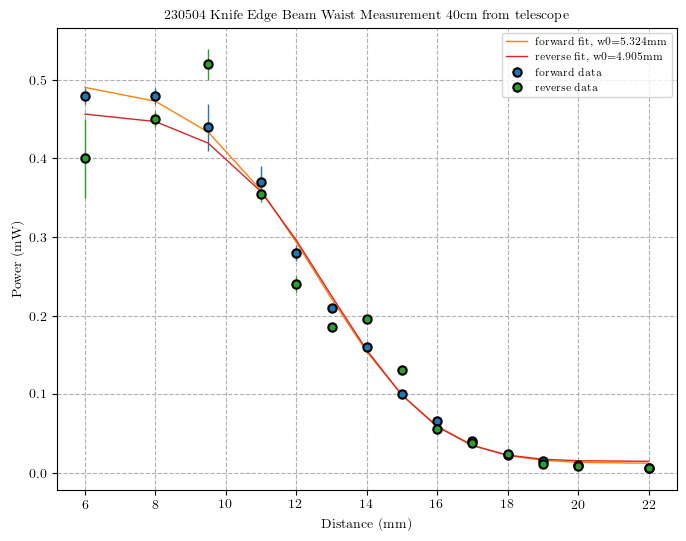

In [5]:
df2 = pd.read_excel("230503KnifeEdgeMeasurement.xlsx",sheet_name="1647")
distance_40cm = df2.iloc[37:51,0].astype(float)
farpower_40cm_forward_distance = df2.iloc[37:51,1].astype(float)
farpower_40cm_forward_distance_uncertaintiy = df2.iloc[37:51,2].astype(float)
farpower_40cm_reversed_distance = df2.iloc[37:51,3].astype(float)
farpower_40cm_reversed_distance_uncertaintiy = df2.iloc[37:51,4].astype(float)

# fit data to error function
# define fitting function
def KnifeEdgeFit(x,a,b,x0,w):
    return b+0.5*a*(1-scipy.special.erf((np.sqrt(2)*(x0-x)/w)))

# Near fit
pOptNearForward, pCovNearForward = curve_fit(KnifeEdgeFit, distance_40cm, farpower_40cm_forward_distance,p0=[0.5,0,14.0,5])
pOptNearReverse, pCovNearReverse = curve_fit(KnifeEdgeFit, distance_40cm, farpower_40cm_reversed_distance,p0=[0.5,0,14.0,5])
print('Beam waist for near forward data fit is %.3fmm.'%pOptNearForward[3])
print('Beam waist for near reverse data fit is %.3fmm.'%pOptNearReverse[3])

# plot data and fit for near data forward and reverse
fig2 = plt.figure(figsize=(8,6))
ax2 = fig2.add_subplot(111)
ax2.errorbar(distance_40cm,farpower_40cm_forward_distance,yerr=farpower_40cm_forward_distance_uncertaintiy,fmt='o',label='forward data')
# ax2.plot(distance_40cm,farpower_40cm_forward_distance,'o',label='forward data')
ax2.plot(distance_40cm,KnifeEdgeFit(distance_40cm,*pOptNearForward),'-',label='forward fit, w0=%.3fmm'%pOptNearForward[3])
ax2.errorbar(distance_40cm,farpower_40cm_reversed_distance,yerr=farpower_40cm_reversed_distance_uncertaintiy,fmt='o',label='reverse data')
# ax2.plot(distance_40cm,farpower_40cm_reversed_distance,'o',label='reverse data')
ax2.plot(distance_40cm,KnifeEdgeFit(distance_40cm,*pOptNearReverse),'-',label='reverse fit, w0=%.3fmm'%pOptNearReverse[3])
ax2.set_xlabel('Distance (mm)')
ax2.set_ylabel('Power (mW)')
ax2.legend(loc=0)
ax2.set_title('230504 Knife Edge Beam Waist Measurement 40cm from telescope')

# plt.show()


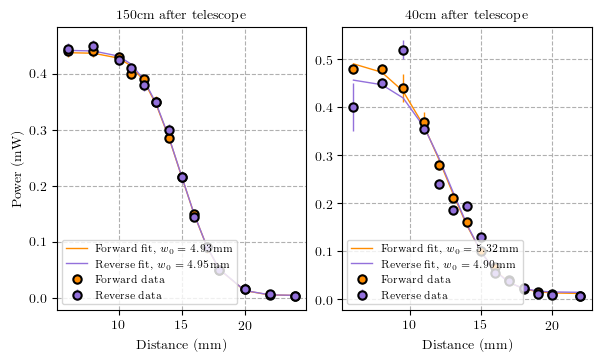

In [17]:
# "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"

# Combine both plots in a 1x2 format
fig_combined, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True)

# Plot the first figure on the first subplot
ax1.errorbar(distance_150cm, farpower_150cm_forward_distance, yerr=farpower_150cm_forward_distance_uncertaintiy, fmt='o', color='darkorange', label='Forward data')
ax1.plot(distance_150cm, KnifeEdgeFit(distance_150cm, *pOptFarForward), '-', color='darkorange', label=fr'Forward fit, $w_0 = {pOptFarForward[3]:.2f} \, \mathrm{{mm}}$')
ax1.errorbar(distance_150cm, farpower_150cm_reversed_distance, yerr=farpower_150cm_reversed_distance_uncertaintiy, fmt='o',color='mediumpurple', label='Reverse data')
ax1.plot(distance_150cm, KnifeEdgeFit(distance_150cm, *pOptFarReverse), '-', color='mediumpurple', label=fr'Reverse fit, $w_0 = {pOptFarReverse[3]:.2f} \, \mathrm{{mm}}$')
ax1.set_xlabel('Distance (mm)')
ax1.set_ylabel('Power (mW)')
ax1.legend(loc='lower left')
ax1.set_title('150cm after telescope')

# Plot the second figure on the second subplot
ax2.errorbar(distance_40cm, farpower_40cm_forward_distance, yerr=farpower_40cm_forward_distance_uncertaintiy, fmt='o',color='darkorange', label='Forward data')
ax2.plot(distance_40cm, KnifeEdgeFit(distance_40cm, *pOptNearForward), '-',color='darkorange', label=fr'Forward fit, $w_0 = {pOptNearForward[3]:.2f} \, \mathrm{{mm}}$')
ax2.errorbar(distance_40cm, farpower_40cm_reversed_distance, yerr=farpower_40cm_reversed_distance_uncertaintiy, fmt='o', color='mediumpurple',label='Reverse data')
ax2.plot(distance_40cm, KnifeEdgeFit(distance_40cm, *pOptNearReverse), '-',color='mediumpurple', label=fr'Reverse fit, $w_0 = {pOptNearReverse[3]:.2f} \, \mathrm{{mm}}$')
ax2.set_xlabel('Distance (mm)')
ax2.legend(loc='lower left')
ax2.set_title('40cm after telescope')

# Adjust layout and show the combined plot
# plt.show()

plt.savefig('250508KnifeEdgeMeasurementCombined.pdf',dpi=300)

In [2]:
# import tex fonts for nice graphs :)

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 18
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['xtick.major.size'] = 5.0
plt.rcParams['xtick.minor.size'] = 3.0
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rcParams['legend.handlelength'] = 1.0

In [3]:
# import fitting package scipy

import scipy
from scipy.optimize import curve_fit

In [4]:
# choose how you want to make the plots appear - comment out where relevant. 
## inline is good for notebooks, qt is good for interactive, nbagg is good for interactive in notebooks

%matplotlib inline
# %matplotlib qt
# %matplotlib nbagg

Beam waist for far forward data fit is 4.692mm.
Beam waist for far reverse data fit is 4.241mm.


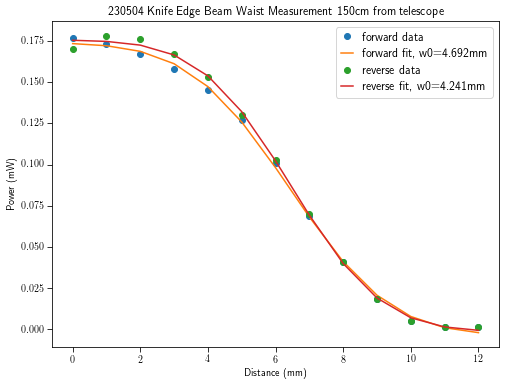

In [ ]:
# get data 

## choose however you want to get the data. for me i use excel files so i use pandas to read them in.
## if you have a csv file, use pd.read_csv("filename.csv")
## if you have an excel file, use pd.read_excel("filename.xlsx")
## if you have a text file, use pd.read_table("filename.txt")
## of course, you can use other packages to read in the data, but i find pandas to be the easiest to use.
## directory wise it is advised to save data on shared>data and then read it off there.
df = pd.read_excel("230504KnifeEdgeMeasurement.xlsx")

# get more data

distance_150cm = df.iloc[1:14,0].astype(float)
farpower_150cm_forward_distance = df.iloc[1:14,1].astype(float)
farpower_150cm_reversed_distance = df.iloc[1:14,3].astype(float)

# fit data to error function
# define fitting function
def KnifeEdgeFit(x,a,b,x0,w):
    return b+0.5*a*(1-scipy.special.erf((np.sqrt(2)*(x0-x)/w)))

# Far fit
pOptFarForward, pCovFarForward = curve_fit(KnifeEdgeFit, distance_150cm, farpower_150cm_forward_distance,p0=[0,0,0,5])
pOptFarReverse, pCovFarReverse = curve_fit(KnifeEdgeFit, distance_150cm, farpower_150cm_reversed_distance,p0=[0,0,0,5])
print('Beam waist for far forward data fit is %.3fmm.'%pOptFarForward[3])
print('Beam waist for far reverse data fit is %.3fmm.'%pOptFarReverse[3])

# plot data and fit for far data forward and reverse

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(distance_150cm,farpower_150cm_forward_distance,'o',label='forward data')
ax.plot(distance_150cm,KnifeEdgeFit(distance_150cm,*pOptFarForward),'-',label='forward fit, w0=%.3fmm'%pOptFarForward[3])
ax.plot(distance_150cm,farpower_150cm_reversed_distance,'o',label='reverse data')
ax.plot(distance_150cm,KnifeEdgeFit(distance_150cm,*pOptFarReverse),'-',label='reverse fit, w0=%.3fmm'%pOptFarReverse[3])
ax.set_xlabel('Distance (mm)')
ax.set_ylabel('Power (mW)')
ax.legend(loc=0)
ax.set_title('230504 Knife Edge Beam Waist Measurement 150cm from telescope')
# plt.show()

# save image


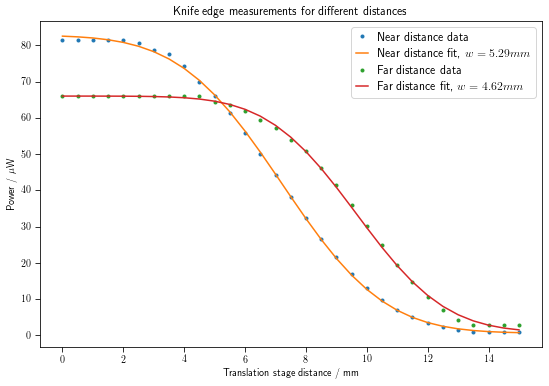

In [ ]:
# Combine all plots
plt.figure(figsize=(9,6))
plt.plot(distance[:-10],power_near[:-10],'.',label='Near distance data')
plt.plot(distance[:-10],KnifeEdgeFit(distance,pOptNear[0],pOptNear[1],pOptNear[2],pOptNear[3])[:-10],label=r'Near distance fit, $w=5.29mm$')
plt.plot(distance[:-10],power_far[:-10],'.',label='Far distance data')
plt.plot(distance[:-10],KnifeEdgeFit(distance,pOptFar[0],pOptFar[1],pOptFar[2],pOptFar[3])[:-10],label=r'Far distance fit, $w=4.62mm$')
plt.legend()
plt.xlabel('Translation stage distance / mm')
plt.ylabel(r'Power / $\mu$W')
plt.title('Knife edge measurements for diff erent distances')
# plt.show()
plt.savefig('230302KnifeEdgeBeamWaist.pdf',bbox_inches='tight',dpi=300)